<a href="https://colab.research.google.com/github/HugoLeda/machine_learning/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=4029ffff991e0f7125bbf0e0b21138736be6436424b906bea6c908ac8dfd2d0e
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [3]:
!wget https://raw.githubusercontent.com/HugoLeda/machine_learning/main/assets/dataset_perceptron.csv

--2024-05-25 20:16:10--  https://raw.githubusercontent.com/HugoLeda/machine_learning/main/assets/dataset_perceptron.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9887 (9.7K) [text/plain]
Saving to: ‘dataset_perceptron.csv’

dataset_perceptron. 100%[===================>]   9.66K  --.-KB/s    in 0s      

2024-05-25 20:16:10 (41.8 MB/s) - ‘dataset_perceptron.csv’ saved [9887/9887]



In [62]:
df = pd.read_csv('dataset_perceptron.csv')

df.describe()

,Feature1,Feature2,Feature3,Feature4,Feature5,Label
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.475609,0.505631,0.462440,0.543263,0.496045,0.460000
std,0.275975,0.280508,0.293122,0.306235,0.300989,0.500908
min,0.015606,0.011714,0.012036,0.013237,0.004695,0.000000
25%,0.251235,0.280697,0.211630,0.274052,0.237791,0.000000
50%,0.424387,0.484988,0.444781,0.596581,0.486842,0.000000
75%,0.685402,0.736638,0.671215,0.786938,0.749337,1.000000
max,0.990339,0.992011,0.988374,0.994401,0.998847,1.000000


In [61]:
df.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Label
0,0.548814,0.715189,0.602763,0.544883,0.423655,1
1,0.645894,0.437587,0.891773,0.963663,0.383442,0
2,0.791725,0.528895,0.568045,0.925597,0.071036,1
3,0.087129,0.020218,0.832620,0.778157,0.870012,0
4,0.978618,0.799159,0.461479,0.780529,0.118274,0


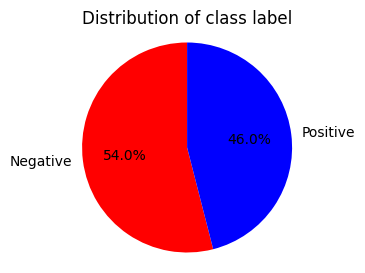

In [60]:
total_records = df.shape[0]

negative_results = df[df['Label'] == 0].shape[0]
positive_results = df[df['Label'] == 1].shape[0]

negative_percentage = (negative_results / total_records) * 100
positive_percentage = (positive_results / total_records) * 100

labels = ['Negative', 'Positive']

colors = ['red', 'blue']

values = [negative_percentage, positive_percentage]

plt.figure(figsize=(4, 3))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of class label')
plt.axis('equal')

plt.show()

In [10]:
X = df.drop('Label', axis=1)
y = df['Label']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [43]:
# Parâmetros para busca
param_grid = {'n_iter_no_change': [100, 1000, 5000], 'eta0': [0.1, 0.25, 0.5]}

grid_search = GridSearchCV(Perceptron(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Melhor modelo: {best_model}")
print(f"Melhores parâmetros: {best_params}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

Melhor modelo: Perceptron(eta0=0.1, n_iter_no_change=1000, random_state=42)
Melhores parâmetros: {'eta0': 0.1, 'n_iter_no_change': 1000}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [48]:
n_iter = 1000
eta_0 = 0.1
perceptron = Perceptron(n_iter_no_change=n_iter, eta0=eta_0, random_state=42)

perceptron.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Perceptron(eta0=0.1, n_iter_no_change=1000, random_state=42)

In [49]:
y_pred = perceptron.predict(X_test)

In [58]:
print(f'accuracy: {accuracy_score(y_test, y_pred) * 100} %\n')
print(classification_report(y_test, y_pred))

accuracy: 65.0 %

              precision    recall  f1-score   support

           0       0.63      1.00      0.77        12
           1       1.00      0.12      0.22         8

    accuracy                           0.65        20
   macro avg       0.82      0.56      0.50        20
weighted avg       0.78      0.65      0.55        20

